# K-Nearest Neighbors

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

data = pd.read_csv('data/league_data_cleaned.csv')

In [2]:
# Check for missing values
data = data.dropna()  # Assuming you want to remove rows with missing values

# Separating features and target variable
X = data.drop(['matchId', 'blueWin'], axis=1)  # Drop non-feature and target variable column
y = data['blueWin']  # Target variable

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Split the data

Dividing the dataset into training and testing.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 70% training and 30% test


## Create and Train

In [4]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors is K

# Fit the classifier to the data
knn.fit(X_train, y_train)


KNeighborsClassifier()

## Evaluate the Model

In [5]:
# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7197908064960088
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      3684
           1       0.71      0.72      0.72      3582

    accuracy                           0.72      7266
   macro avg       0.72      0.72      0.72      7266
weighted avg       0.72      0.72      0.72      7266



## Confusion Matrix

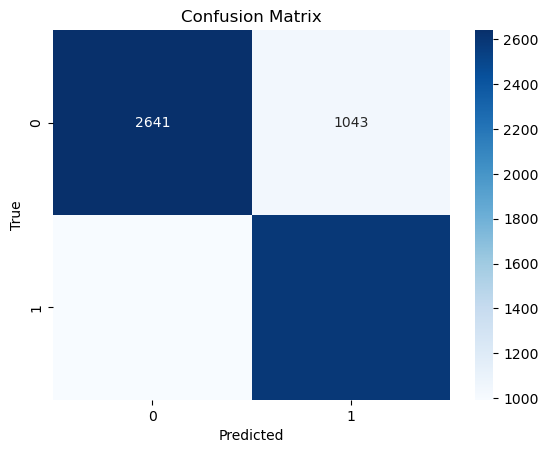

In [6]:
# Predictions
y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Importance Visualization

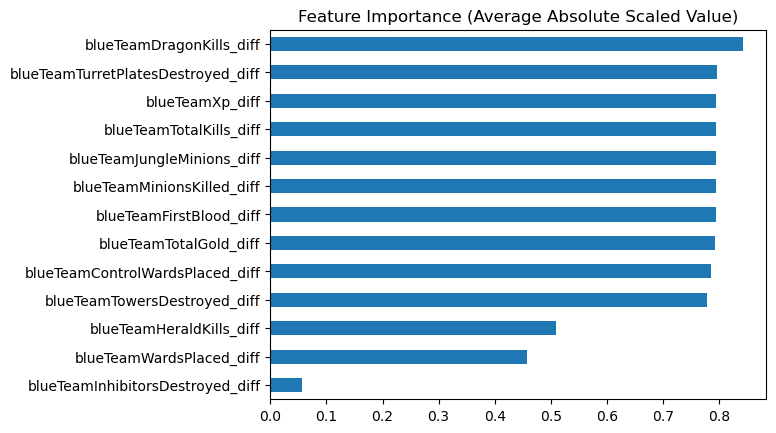

In [7]:
feature_importance = pd.Series(data=np.mean(np.abs(X_scaled), axis=0), index=data.columns.drop(['matchId', 'blueWin']))
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance (Average Absolute Scaled Value)')
plt.show()


## ROC Curve

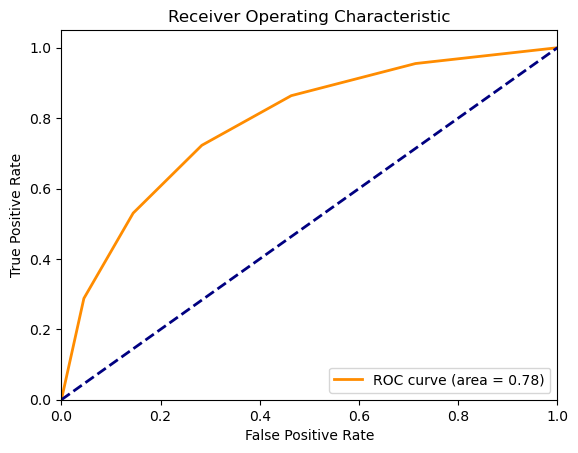

In [8]:
# Calculate the probabilities of each class
y_scores = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Accuracy V Number of Neighbors

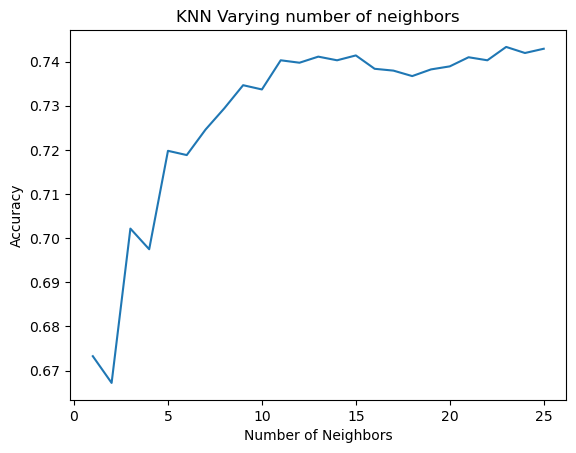

In [9]:
accuracies = []
neighbors = range(1, 26)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

plt.plot(neighbors, accuracies)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of neighbors')
plt.show()
